In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [36]:
df=pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


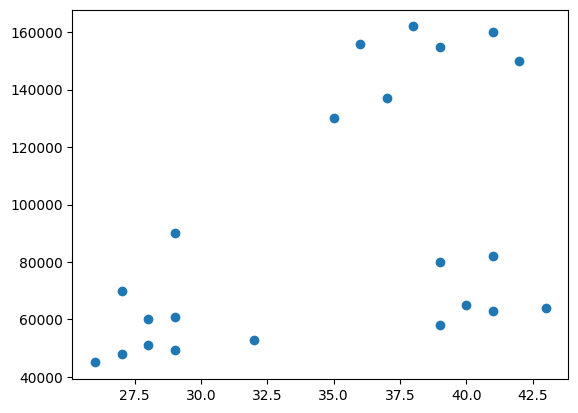

In [3]:
plt.scatter(df['Age'],df['Income($)'])

In [4]:
km=KMeans(n_clusters=3)
km

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [35]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [40]:
df['cluster']=y_predicted

df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


C:\Users\sakshi\AppData\Local\Temp\ipykernel_4632\3223038167.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


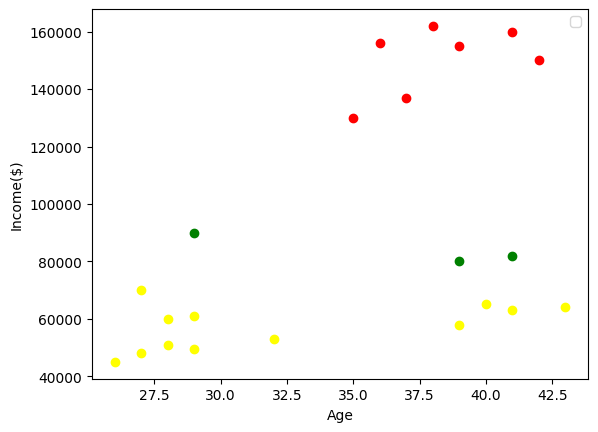

In [15]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color="green")
plt.scatter(df2.Age,df2['Income($)'],color="red")
plt.scatter(df3.Age,df3['Income($)'],color="yellow")

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [38]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


In [32]:
print(df['Age'].min(), df['Age'].max())



0.0 0.0


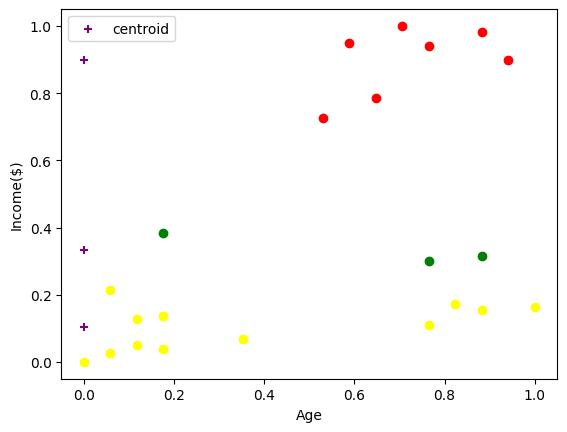

In [43]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color="green")
plt.scatter(df2.Age,df2['Income($)'],color="red")
plt.scatter(df3.Age,df3['Income($)'],color="yellow")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker="+",label="centroid")
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [42]:
km.cluster_centers_

array([[0.        , 0.33333333],
       [0.        , 0.8974359 ],
       [0.        , 0.10505698]])

In [44]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [45]:
sse

[5.434011511988177,
 2.0911363886990766,
 0.4750783498553095,
 0.3698658919234832,
 0.2621792762345213,
 0.22443334487241415,
 0.1941252765861644,
 0.14686902060545334,
 0.1093859837704661]

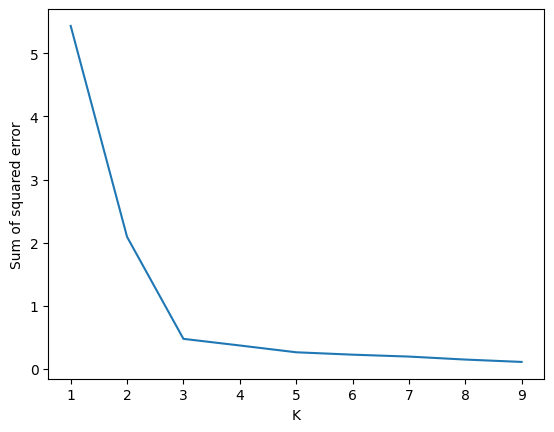

In [46]:
plt.xlabel("K")
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)